# Sample Similarity

The goal of Resemblance Model is understanding how different two samples are from a multivariate perspective.

Having two datasets say X1 and X2, one can analyse how easy is it to recognize which dataset a randomly selected row comes from. The Resemblance model assigns label 0 to X1 dataset, and label 1 to X2 and trains a binary classification model that to predict, which sample a given row comes from.

## Setup

In [1]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Prepare two samples
feature_names = ['f1', 'f2', 'f3', 'f4']
X1, _ = make_classification(n_samples=900, n_features=4, scale=1, random_state = 2)
X2, _ = make_classification(n_samples=1000, n_features=4, scale=1, random_state = 1)

# Prepare model
clf = RandomForestClassifier(n_estimators = 1000, max_depth=2, random_state=0)

## Permutation Importance Resemblance Model

The class that can be used to analyse the similarity of two samples if PermutationImportanceResemblance.

It first trains a model to recognize between X1 and X2. Then, it calculates train and test AUC. If test set AUC is significantly higher than 0.5, it indicates that the model has some predictive power in determining dataset, and therefore, the two samples are to some extent different.

Further, the class applies permutation feature importance, in order to understand, which features does the current model rely the most on. The higher the importance of the feature, the more a given feature possibly differs in X2 compared to X1. The importance indicates how much the test AUC drops if a given feature is permuted.

In [2]:
from probatus.sample_similarity import PermutationImportanceResemblance

perm = PermutationImportanceResemblance(clf)
perm.fit_compute(X1, X2, columns=feature_names)

,mean_importance,std_importance
f4,0.184215,0.019749
f2,0.167709,0.016371
f1,0.072187,0.010964
f3,0.041909,0.006084


In order to get the train and test AUC use return_tuple=True parameter in compute().

In [23]:
importances, train_auc, test_auc = perm.compute(return_tuple=True)
display(importances)
print('Train AUC: {}'.format(train_auc))
print('Test AUC: {}.'.format(test_auc))

,mean_importance,std_importance
f4,0.184215,0.019749
f2,0.167709,0.016371
f1,0.072187,0.010964
f3,0.041909,0.006084


Train AUC: 0.8895252842053705
Test AUC: 0.8725099601593626.


Since AUC on test is high, it is evident that these samples have different distributions. Comparing AUC on train and test, we can indicate that there is no overfitting. The feature importance in the table shows f4 and f2 features have the highest importance

Further, one can analyse the distribution of permutation importance using plot() method. In the plot() one can also specify top_n parameter, which indicates how many top features to plot.

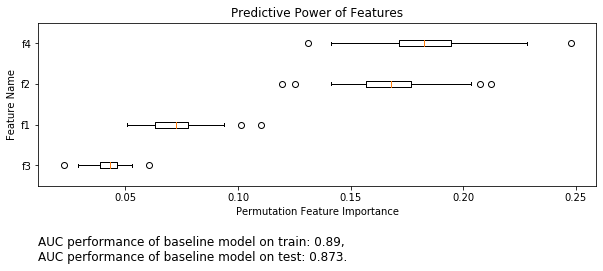

In [24]:
perm.plot()